<a href="https://colab.research.google.com/github/rebeccali/xflr5_parser/blob/master/Foil_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.integrate as scint
import scipy.interpolate as scipo

This is a simple analysis to find the maximum pitch up moment for a given alpha. We integrate this over time in order to find out how long it takes to do this.

We have some $C_M(alpha)$ and $C_L(\alpha)$, and can use this plus max thrust to derive 
pitch acceleration or $\ddot{\alpha} = f(\alpha)$. Then we simply integrate this to get $\alpha(t)$, $\alpha(0) = 0$, $\alpha(T) > 90^o$

$\ddot{\alpha} = -C_L(\alpha) q S r_L + C_M(\alpha) q S c + r_T T sin\theta$



* S is wing area
* c is chord length
* $r_L$ is distance from center of mass to quarter chord
* $r_T$ is distance from center of mass to thrust pivot
* T is thrust
* $\theta$ is propellor angle, postive being pointed up


The numeric integration we need to perform is:

$\alpha(T) = \int\int\ddot{\alpha} dt dt $

The limits of integration [0,T] don't matter as long as T is long enough such that we see how long it takes to hit 90 degrees. 



In [0]:
# Load the data. testPolar is available in the repo
try:
  mh45_data = pd.read_csv("testPolar.csv")
except:
  print("Please upload the testPolar.csv gia the sidebar.")
  
# print(list(mh45_data))

alpha_data = mh45_data['alpha']
cl_data = mh45_data['CL']
cm_data = mh45_data['Cm']

In [0]:
# Set the variables
S = 1
c = 0.3
theta = 8*np.pi/180
T = 5
r_L = 0.02
r_T = 0.08
q = 0.5*1.225*2**2 # 0.5 rho v^2 

cl = scipo.interp1d(alpha_data, cl_data)
cm = scipo.interp1d(alpha_data, cm_data)

In [0]:
# Do the integration 
T = 10

# U = [alpha, dalpha]

# dU_dx not dependent on t hilariously enough 
def dU_dx(U, t):
  alpha = U[0]
  return [U[1], -cl(alpha)*r_L*q*S + cm(alpha) * q * S * c + r_T * T * np.sin(theta)]

U0 = [0,0]
ts = np.linspace(0,10,200)
Us = scint.odeint(dU_dx, U0, ts)
alphas = Us[:,0]



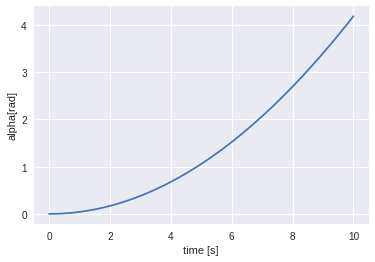

1.5707963267948966

In [40]:
plt.xlabel('time [s]')
plt.ylabel('alpha[rad]')
plt.plot(ts,alphas)
plt.show()
np.pi/2